# TensorFlow Inference

In [25]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Predict process image

In [26]:
def preprocess(img_path):
    img = cv2.imread(img_path)
    
    # Check if image loaded successfully
    if img is None:
        raise FileNotFoundError(f"❌ Cannot read image: {img_path}")
    
    img = cv2.resize(img, (640, 640))
    img = img / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [27]:
# Load tf model
import tensorflow as tf
TF_MODEL_PATH = "runs/detect/train/weights/best_saved_model"
loaded_model = tf.saved_model.load(TF_MODEL_PATH)

# Get inference function
infer = loaded_model.signatures["serving_default"]

print("✅ Model loaded successfully!")
print(f"Available signatures: {list(loaded_model.signatures.keys())}")

✅ Model loaded successfully!
Available signatures: ['serving_default']


In [28]:
import os

# Fix path - gunakan path relatif yang benar
img_path = "dataset/images/val/123_20220503T061702133Z_s00.mp4___450.jpg"

# Check if file exists
if not os.path.exists(img_path):
    print(f"⚠️ File not found: {img_path}")
    print(f"Current directory: {os.getcwd()}")
    
    # List available images
    val_images = os.listdir("dataset/images/val")[:5]
    print(f"\nAvailable images in val folder:")
    for img in val_images:
        print(f"  - {img}")
    
    # Use first available image
    img_path = os.path.join("dataset/images/val", val_images[0])
    print(f"\n✅ Using: {img_path}")

# Preprocess and predict
img = preprocess(img_path)
input_tensor = tf.convert_to_tensor(img, dtype=tf.float32)

# Call model with correct signature
detections = infer(input_tensor)

print("\n🔍 Detection Results:")
print(detections)


🔍 Detection Results:
{'output_0': <tf.Tensor: shape=(1, 8, 8400), dtype=float32, numpy=
array([[[6.1881685e+00, 8.9687042e+00, 1.4471291e+01, ...,
         4.7621768e+02, 4.9314978e+02, 5.1347260e+02],
        [5.1599455e+00, 4.1142068e+00, 3.3380563e+00, ...,
         5.7902618e+02, 5.8614429e+02, 5.8327417e+02],
        [1.4090046e+01, 1.8790318e+01, 2.2331947e+01, ...,
         3.2466742e+02, 2.9401450e+02, 2.5542386e+02],
        ...,
        [3.1434264e-04, 1.8060773e-04, 5.7195117e-05, ...,
         1.0701122e-03, 1.1071180e-03, 1.1264494e-03],
        [5.3821255e-05, 6.7272398e-05, 6.1277417e-05, ...,
         1.1156645e-03, 1.1864105e-03, 1.1736999e-03],
        [4.3467349e-05, 6.2007137e-05, 7.0412287e-05, ...,
         1.1621984e-03, 1.2228382e-03, 1.2321104e-03]]], dtype=float32)>}


# Inference images in training and validation

Found 12 validation images and 20 training images


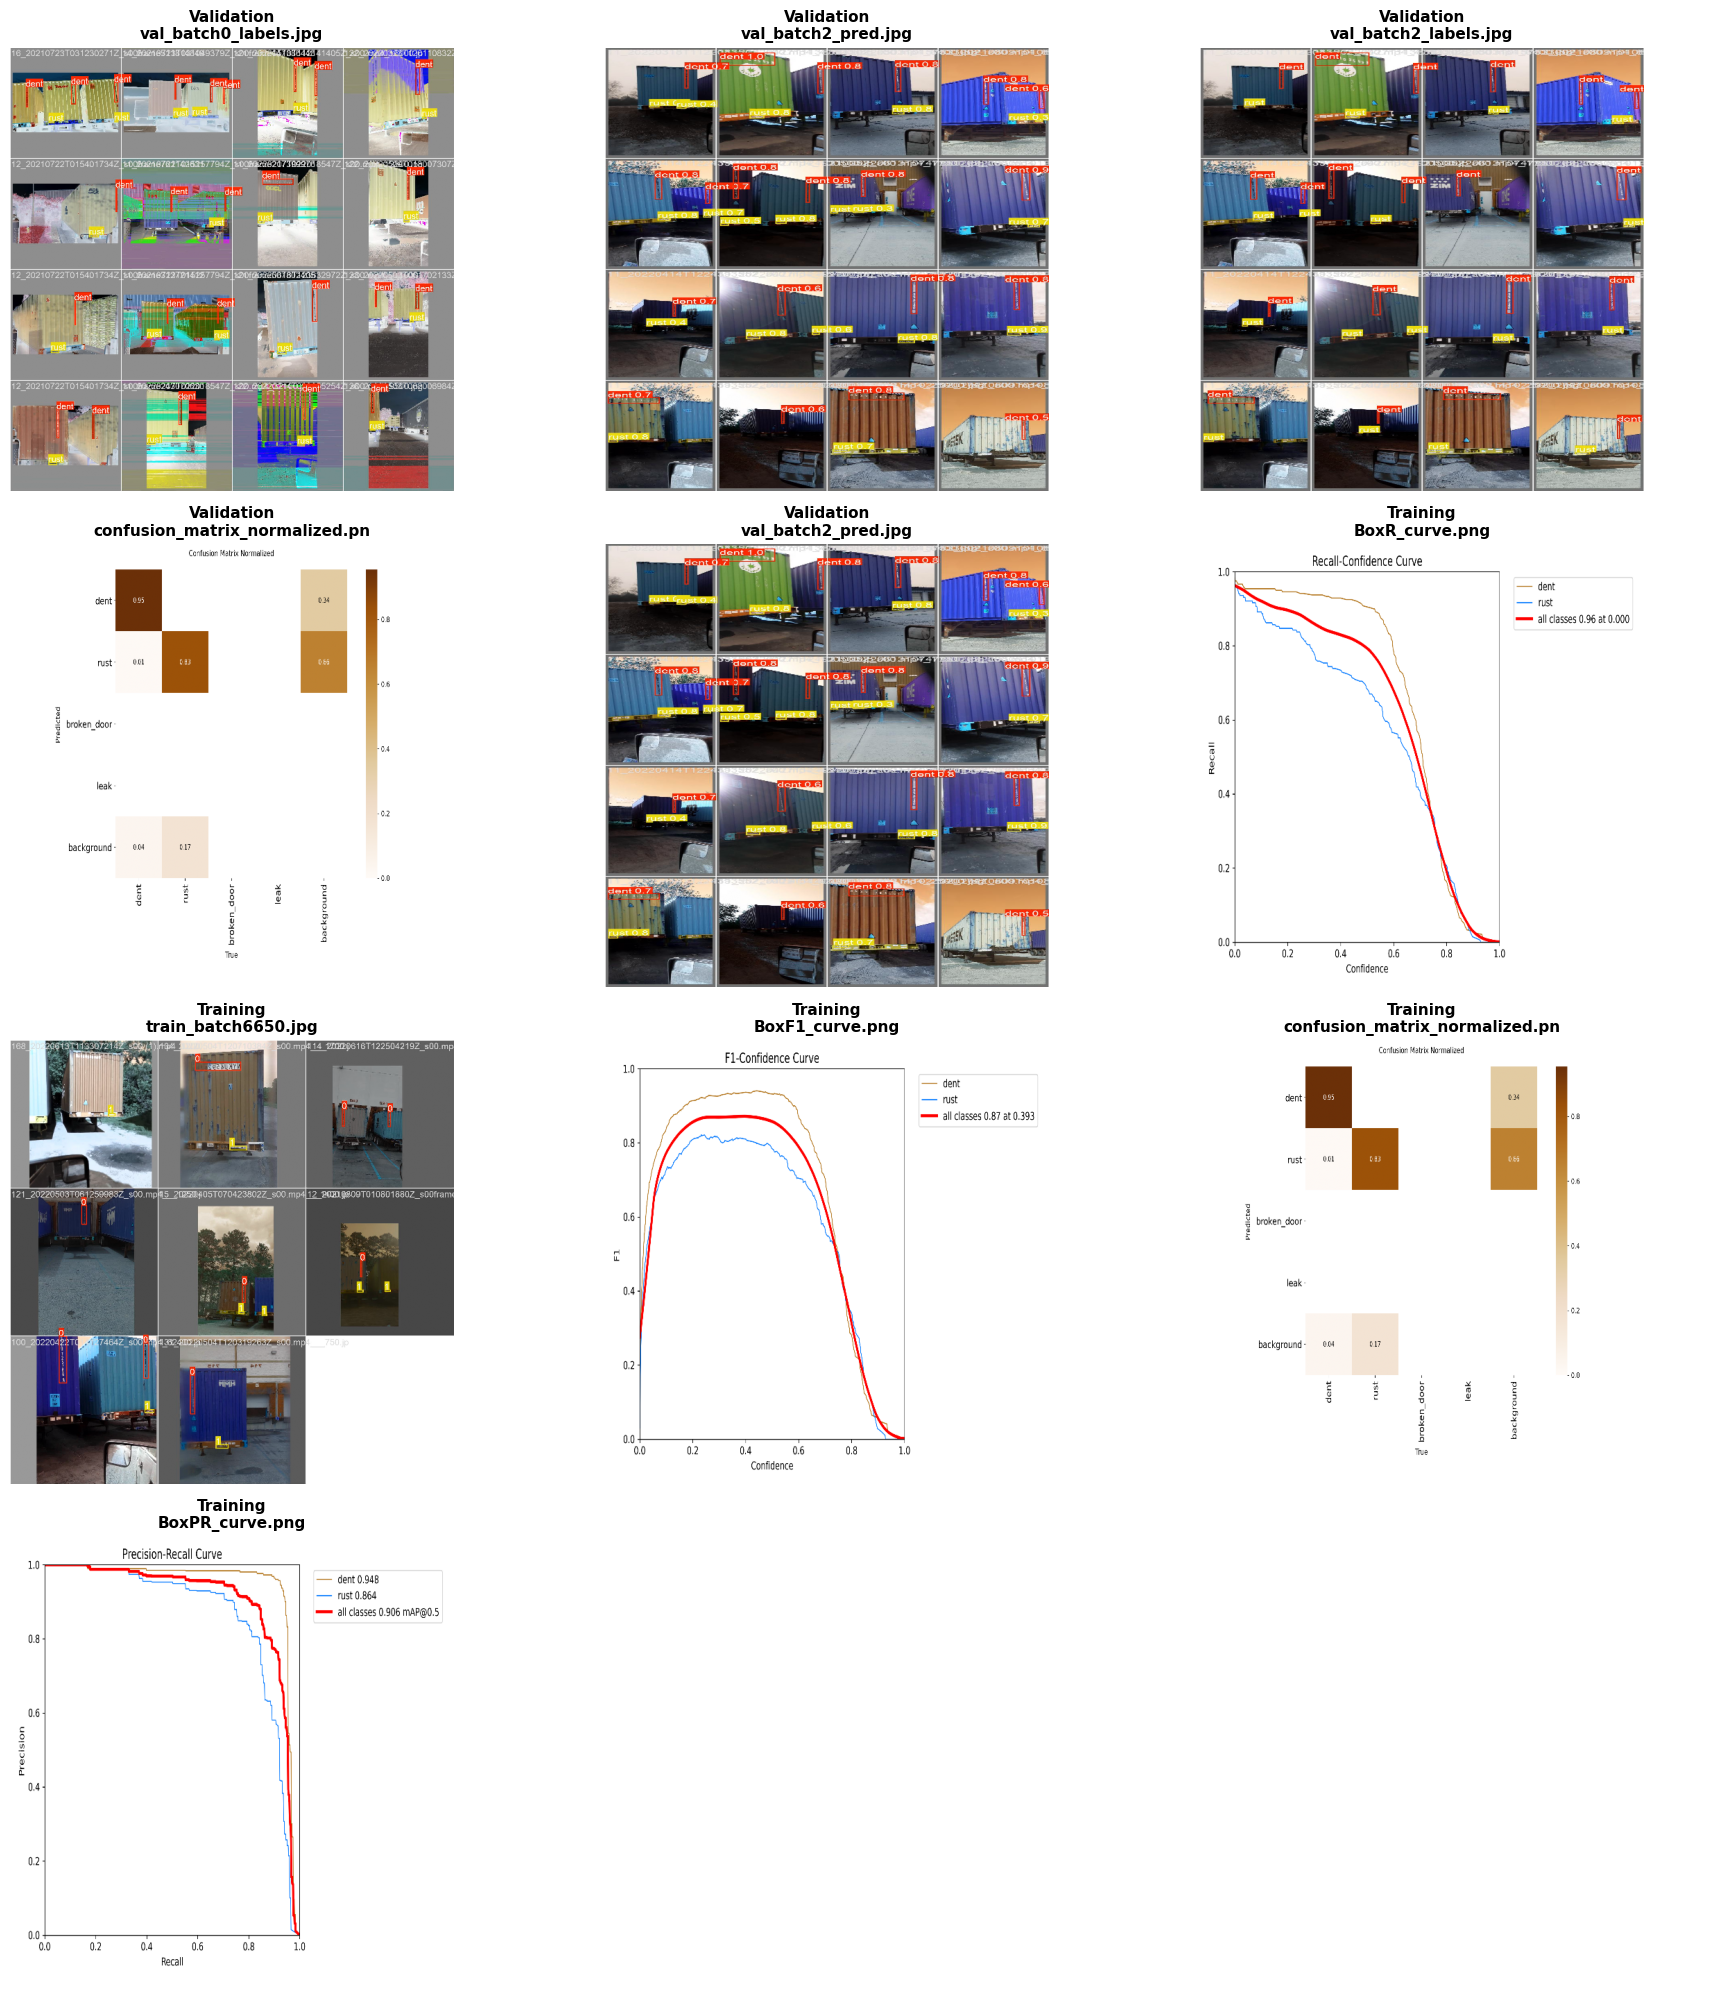

In [43]:
import matplotlib.pyplot as plt

# Get valid image files (filter .DS_Store and non-image files)
def get_image_files(directory):
    files = os.listdir(directory)
    return [f for f in files if f.endswith(('.jpg', '.jpeg', '.png')) and not f.startswith('.')]

# Get image lists
val_images = get_image_files("runs/detect/val")
train_images = get_image_files("runs/detect/train")

print(f"Found {len(val_images)} validation images and {len(train_images)} training images")

# Show 5 validation + 5 training = 10 images total (3 columns, 4 rows)
num_images = 5
fig, axes = plt.subplots(4, 3, figsize=(18, 20))  # 3 kolom, 4 baris
axes = axes.flatten()

# Validation images (5 images)
for i in range(num_images):
    img_name = np.random.choice(val_images)
    img_path = os.path.join("runs/detect/val", img_name)
    img = preprocess(img_path)
    input_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
    val_detections = infer(input_tensor)
    
    axes[i].imshow(img[0])
    axes[i].set_title(f"Validation\n{img_name[:30]}", fontsize=11, fontweight='bold')
    axes[i].axis('off')

# Training images (5 images)
for i in range(num_images):
    idx = i + num_images
    img_name = np.random.choice(train_images)
    img_path = os.path.join("runs/detect/train", img_name)
    img = preprocess(img_path)
    input_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
    train_detections = infer(input_tensor)
    
    axes[idx].imshow(img[0])
    axes[idx].set_title(f"Training\n{img_name[:30]}", fontsize=11, fontweight='bold')
    axes[idx].axis('off')

# Hide extra subplots
for i in range(10, 12):
    axes[i].axis('off')

plt.tight_layout()
plt.show()